Loading required Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
import re
import warnings
warnings.filterwarnings('ignore')

Loading the data

In [2]:
df = pd.read_csv('urldataset.csv')

In [3]:
df.head()

,url,result
0,https://sellait.site/id/app/user.php,1
1,https://solucioneskinesicas.com/Sella/app/user...,1
2,https://open-spotify.site/it/Autenticazione/ap...,1
3,https://sellabanca.site/Autenticazione/app/use...,1
4,https://1r5applmnt.com,1


In [4]:
# Length of URL
df['url_length'] = df['url'].apply(lambda x: len(x))

# URL has http
df['url_has_http//'] = df['url'].apply(lambda x: 1 if 'http://' in x else 0)

# URL has https
df['url_has_https//'] = df['url'].apply(lambda x: 1 if 'https://' in x else 0)

# URL has num
df['url_contains_num'] = df['url'].apply(lambda url: 1 if re.search(r'\d', url) else 0)

# Number of dots
df['url_num_dots'] = df['url'].apply(lambda x: x.count('.'))

# Number of slashes
df['url_num_slashes'] = df['url'].apply(lambda x: x.count('/'))

# Number of Dash
df['number_of_dash'] = df['url'].apply(lambda x: x.count('-'))

# @ Symbol
df['has_at_symbol'] = df['url'].apply(lambda x: 1 if '@' in x else 0)

# Tilde Symbol
df['has_tilde_symbol'] = df['url'].apply(lambda x: 1 if '~' in x else 0)

# Number of Underscore
df['number_of_underscore'] = df['url'].apply(lambda x: x.count('_'))

# Number of NumPercent
df['number_of_numpercent'] = df['url'].apply(lambda x: x.count('%'))

# Number of Ampersand
df['number_of_ampersand'] = df['url'].apply(lambda x: x.count('&'))

# Number of Hash
df['number_of_hash'] = df['url'].apply(lambda x: x.count('#'))

# URL contains IP address
df['url_contains_ip'] = df['url'].apply(lambda url: 1 if re.search(r'\b(?:[0-9]{1,3}\.){3}[0-9]{1,3}\b', url) else 0)


In [5]:
df.head()

,url,result,url_length,url_has_http//,url_has_https//,url_contains_num,url_num_dots,url_num_slashes,number_of_dash,has_at_symbol,has_tilde_symbol,number_of_underscore,number_of_numpercent,number_of_ampersand,number_of_hash,url_contains_ip
0,https://sellait.site/id/app/user.php,1,36,0,1,0,2,5,0,0,0,0,0,0,0,0
1,https://solucioneskinesicas.com/Sella/app/user...,1,50,0,1,0,2,5,0,0,0,0,0,0,0,0
2,https://open-spotify.site/it/Autenticazione/ap...,1,56,0,1,0,2,6,1,0,0,0,0,0,0,0
3,https://sellabanca.site/Autenticazione/app/use...,1,51,0,1,0,2,5,0,0,0,0,0,0,0,0
4,https://1r5applmnt.com,1,22,0,1,1,1,2,0,0,0,0,0,0,0,0


In [6]:
df = df.drop(['url'], axis = 1)

In [7]:
df.head()

,result,url_length,url_has_http//,url_has_https//,url_contains_num,url_num_dots,url_num_slashes,number_of_dash,has_at_symbol,has_tilde_symbol,number_of_underscore,number_of_numpercent,number_of_ampersand,number_of_hash,url_contains_ip
0,1,36,0,1,0,2,5,0,0,0,0,0,0,0,0
1,1,50,0,1,0,2,5,0,0,0,0,0,0,0,0
2,1,56,0,1,0,2,6,1,0,0,0,0,0,0,0
3,1,51,0,1,0,2,5,0,0,0,0,0,0,0,0
4,1,22,0,1,1,1,2,0,0,0,0,0,0,0,0


In [8]:
df['result'].value_counts()

result
0    480324
1    259798
Name: count, dtype: int64

In [9]:
df.shape

(740122, 15)

In [10]:
df.columns

Index(['result', 'url_length', 'url_has_http//', 'url_has_https//',
       'url_contains_num', 'url_num_dots', 'url_num_slashes', 'number_of_dash',
       'has_at_symbol', 'has_tilde_symbol', 'number_of_underscore',
       'number_of_numpercent', 'number_of_ampersand', 'number_of_hash',
       'url_contains_ip'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740122 entries, 0 to 740121
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   result                740122 non-null  int64
 1   url_length            740122 non-null  int64
 2   url_has_http//        740122 non-null  int64
 3   url_has_https//       740122 non-null  int64
 4   url_contains_num      740122 non-null  int64
 5   url_num_dots          740122 non-null  int64
 6   url_num_slashes       740122 non-null  int64
 7   number_of_dash        740122 non-null  int64
 8   has_at_symbol         740122 non-null  int64
 9   has_tilde_symbol      740122 non-null  int64
 10  number_of_underscore  740122 non-null  int64
 11  number_of_numpercent  740122 non-null  int64
 12  number_of_ampersand   740122 non-null  int64
 13  number_of_hash        740122 non-null  int64
 14  url_contains_ip       740122 non-null  int64
dtypes: int64(15)
memory usage: 84.7 MB

In [12]:
df.describe()

,result,url_length,url_has_http//,url_has_https//,url_contains_num,url_num_dots,url_num_slashes,number_of_dash,has_at_symbol,has_tilde_symbol,number_of_underscore,number_of_numpercent,number_of_ampersand,number_of_hash,url_contains_ip
count,740122.000000,740122.000000,740122.000000,740122.000000,740122.000000,740122.000000,740122.000000,740122.000000,740122.000000,740122.000000,740122.000000,740122.000000,740122.000000,740122.000000,740122.000000
mean,0.351021,53.036285,0.209429,0.791841,0.432390,2.480873,3.751690,0.938478,0.007062,0.005217,0.279330,0.069514,0.106288,0.003125,0.007270
std,0.477290,61.024163,0.406901,0.405991,0.495408,1.105274,1.706932,2.262154,0.083741,0.072038,1.135541,1.080245,0.757299,0.195804,0.084956
min,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,0.000000,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,43.000000,0.000000,1.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,63.000000,0.000000,1.000000,1.000000,3.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,25523.000000,1.000000,1.000000,1.000000,99.000000,119.000000,286.000000,1.000000,1.000000,200.000000,149.000000,50.000000,152.000000,1.000000


In [13]:
df.nunique()

result                    2
url_length              774
url_has_http//            2
url_has_https//           2
url_contains_num          2
url_num_dots             40
url_num_slashes          43
number_of_dash           54
has_at_symbol             2
has_tilde_symbol          2
number_of_underscore     50
number_of_numpercent     79
number_of_ampersand      36
number_of_hash            9
url_contains_ip           2
dtype: int64

In [14]:
df.isnull().sum()

result                  0
url_length              0
url_has_http//          0
url_has_https//         0
url_contains_num        0
url_num_dots            0
url_num_slashes         0
number_of_dash          0
has_at_symbol           0
has_tilde_symbol        0
number_of_underscore    0
number_of_numpercent    0
number_of_ampersand     0
number_of_hash          0
url_contains_ip         0
dtype: int64

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
result,740122.0,0.351021,0.477290,0.0,0.0,0.0,1.0,1.0
url_length,740122.0,53.036285,61.024163,8.0,30.0,43.0,63.0,25523.0
url_has_http//,740122.0,0.209429,0.406901,0.0,0.0,0.0,0.0,1.0
url_has_https//,740122.0,0.791841,0.405991,0.0,1.0,1.0,1.0,1.0
url_contains_num,740122.0,0.432390,0.495408,0.0,0.0,0.0,1.0,1.0
url_num_dots,740122.0,2.480873,1.105274,0.0,2.0,2.0,3.0,99.0
url_num_slashes,740122.0,3.751690,1.706932,2.0,2.0,3.0,5.0,119.0
number_of_dash,740122.0,0.938478,2.262154,0.0,0.0,0.0,1.0,286.0
has_at_symbol,740122.0,0.007062,0.083741,0.0,0.0,0.0,0.0,1.0
has_tilde_symbol,740122.0,0.005217,0.072038,0.0,0.0,0.0,0.0,1.0


In [16]:
df.duplicated().sum()

649432

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(90690, 15)

In [20]:
clmns=['result','url_has_http//','url_has_https//']
for i in clmns:
    print(f"The Value counts of {i} :")
    print(df[i].value_counts().to_string(),'\n')

The Value counts of result :
result
0    47058
1    43632 

The Value counts of url_has_http// :
url_has_http//
0    62011
1    28679 

The Value counts of url_has_https// :
url_has_https//
1    62588
0    28102 



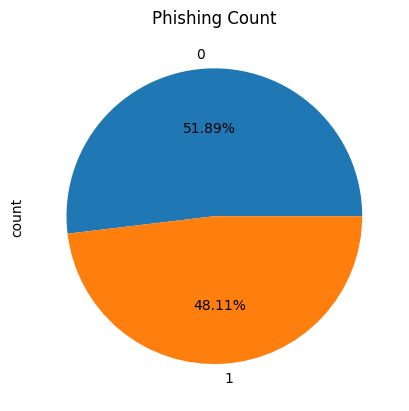

In [21]:

df['result'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

0 = Not phis(legitmate)
1 = phising

<Axes: xlabel='result'>

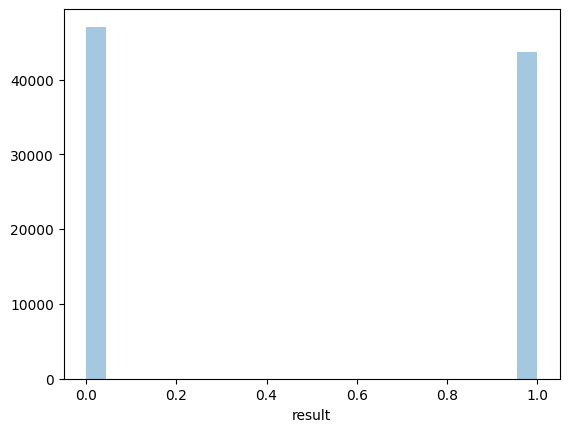

In [29]:
sns.distplot( a=df["result"], hist=True, kde=False, rug=False )

<Axes: xlabel='result', ylabel='Density'>

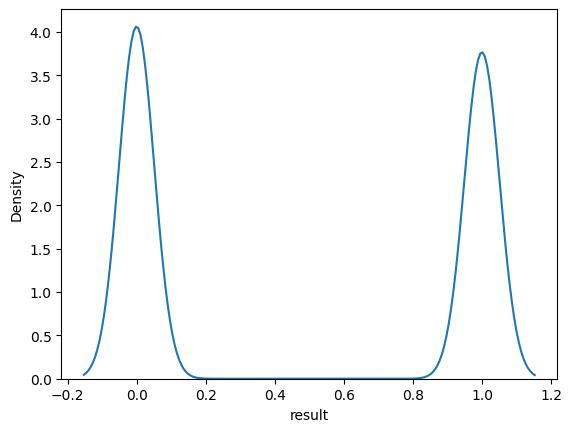

In [30]:
sns.kdeplot(df['result'])


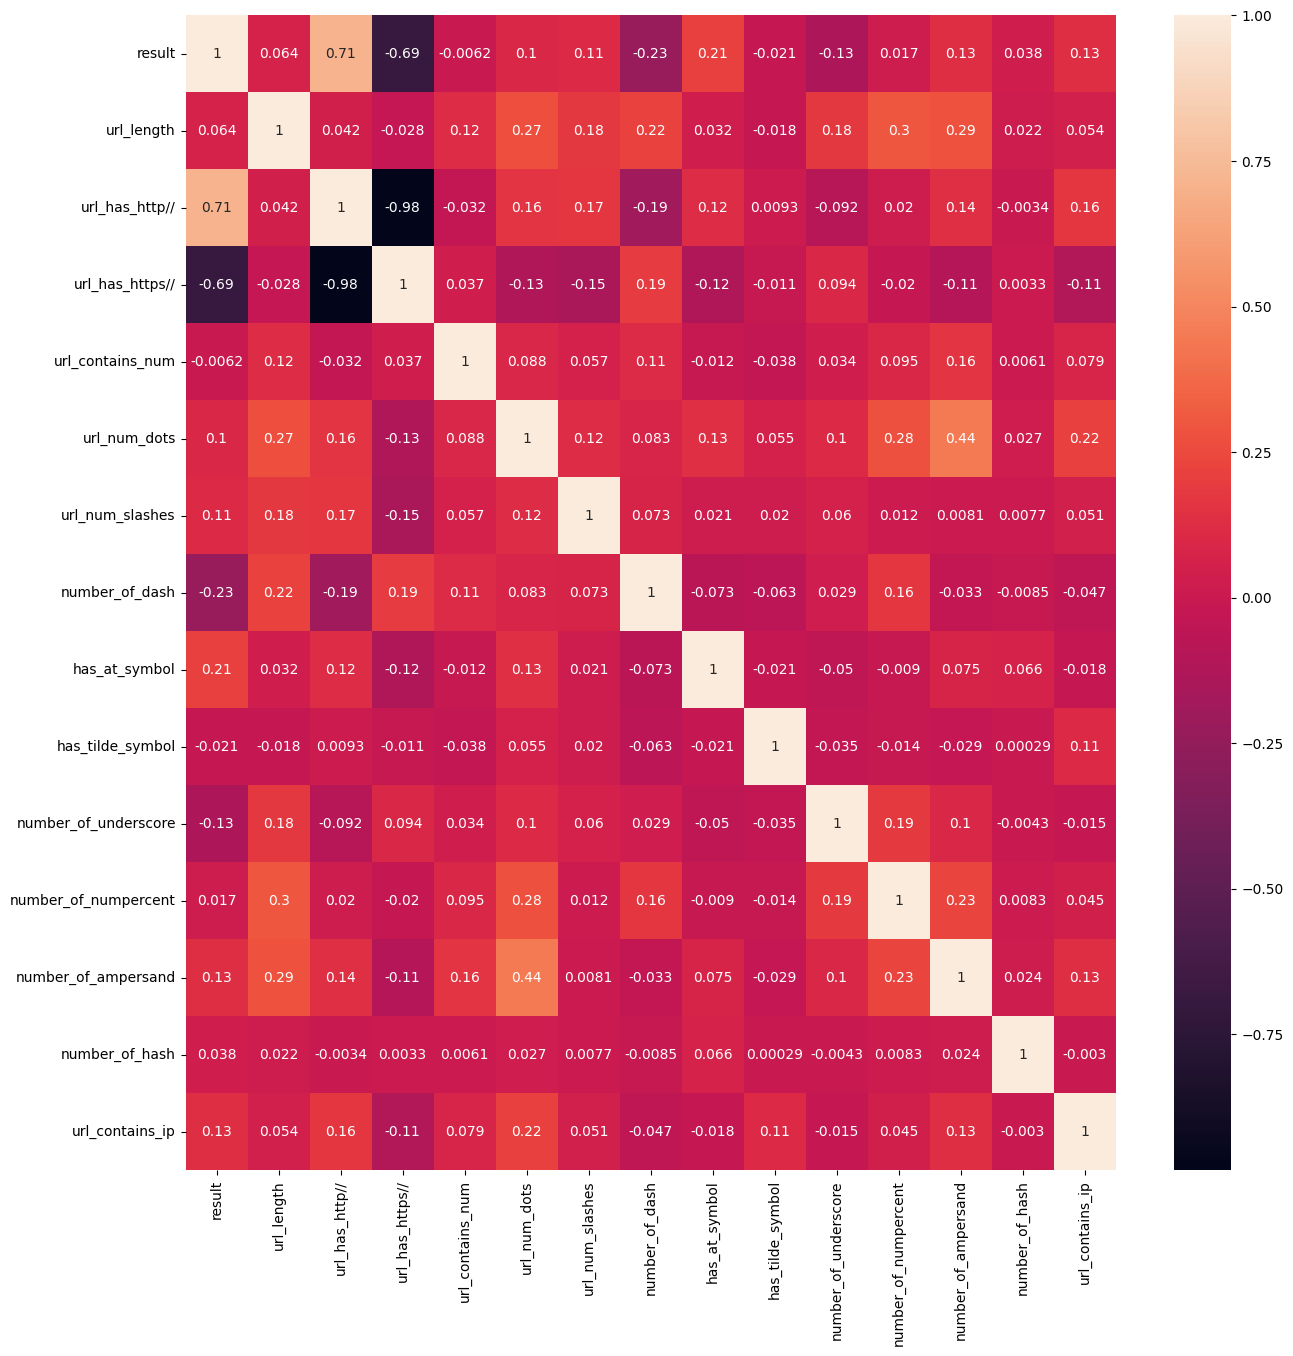

In [36]:

plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [37]:
df.corr()

,result,url_length,url_has_http//,url_has_https//,url_contains_num,url_num_dots,url_num_slashes,number_of_dash,has_at_symbol,has_tilde_symbol,number_of_underscore,number_of_numpercent,number_of_ampersand,number_of_hash,url_contains_ip
result,1.000000,0.064364,0.706208,-0.694453,-0.006228,0.100274,0.106274,-0.225094,0.207643,-0.020911,-0.134809,0.016651,0.125187,0.037708,0.125217
url_length,0.064364,1.000000,0.042321,-0.028331,0.119537,0.268261,0.175573,0.224724,0.031884,-0.017645,0.176587,0.296155,0.286757,0.022426,0.054155
url_has_http//,0.706208,0.042321,1.000000,-0.983470,-0.031712,0.158921,0.169581,-0.191123,0.121468,0.009277,-0.091826,0.019724,0.137262,-0.003365,0.164260
url_has_https//,-0.694453,-0.028331,-0.983470,1.000000,0.036568,-0.127231,-0.145530,0.189546,-0.124412,-0.011054,0.093691,-0.020242,-0.106388,0.003312,-0.111083
url_contains_num,-0.006228,0.119537,-0.031712,0.036568,1.000000,0.087773,0.057023,0.110307,-0.012062,-0.038141,0.034165,0.095325,0.158346,0.006057,0.078838
url_num_dots,0.100274,0.268261,0.158921,-0.127231,0.087773,1.000000,0.121849,0.082661,0.133951,0.054991,0.102119,0.275189,0.443535,0.027481,0.216401
url_num_slashes,0.106274,0.175573,0.169581,-0.145530,0.057023,0.121849,1.000000,0.073122,0.020796,0.019945,0.059978,0.011751,0.008108,0.007726,0.051114
number_of_dash,-0.225094,0.224724,-0.191123,0.189546,0.110307,0.082661,0.073122,1.000000,-0.072777,-0.063341,0.029477,0.163386,-0.033403,-0.008469,-0.046788
has_at_symbol,0.207643,0.031884,0.121468,-0.124412,-0.012062,0.133951,0.020796,-0.072777,1.000000,-0.021229,-0.050297,-0.009044,0.075306,0.066122,-0.018429
has_tilde_symbol,-0.020911,-0.017645,0.009277,-0.011054,-0.038141,0.054991,0.019945,-0.063341,-0.021229,1.000000,-0.034964,-0.013528,-0.029158,0.000289,0.105356


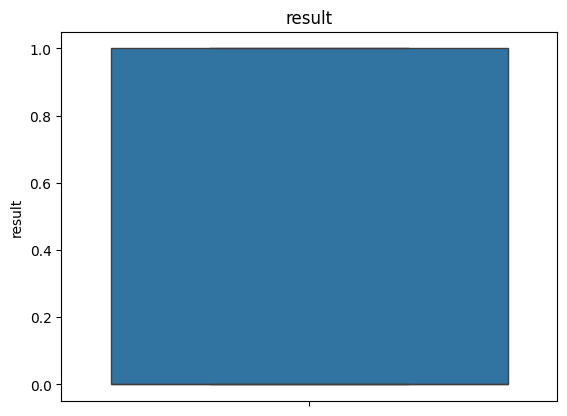

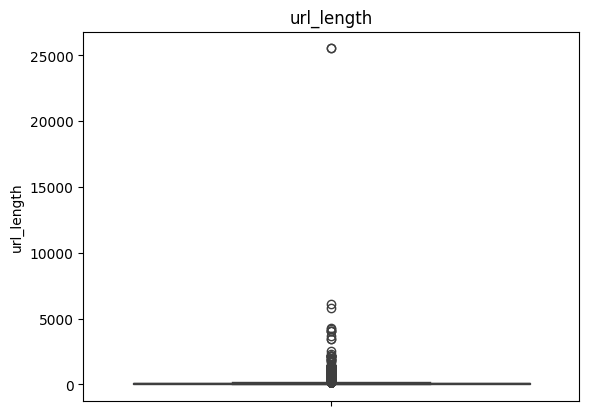

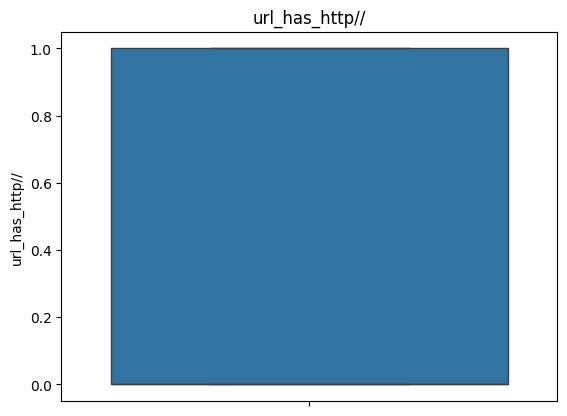

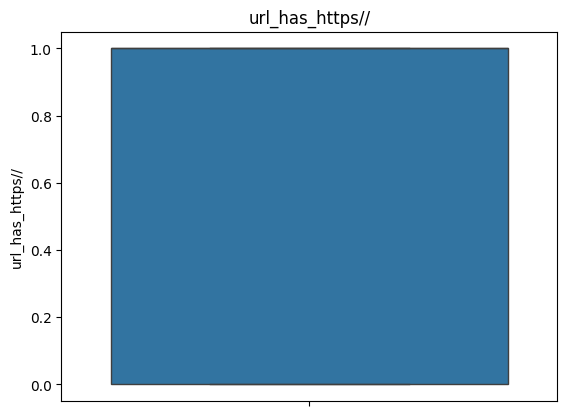

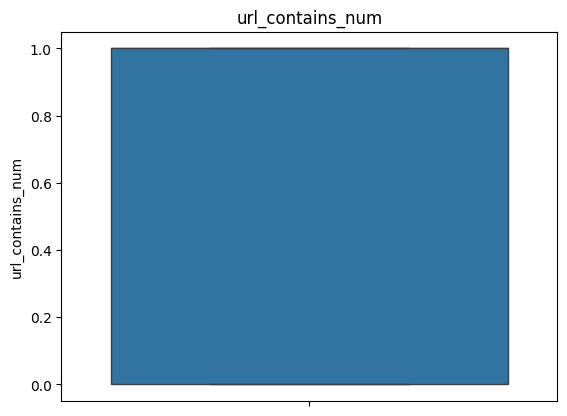

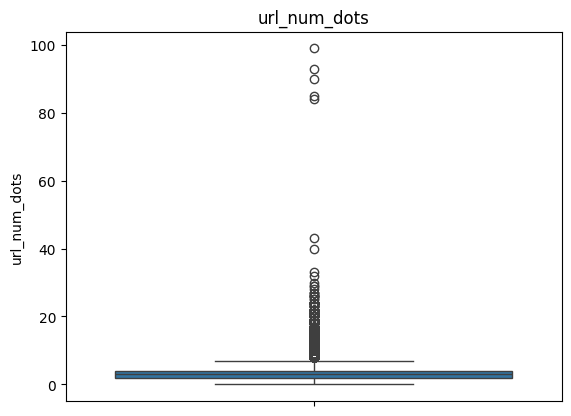

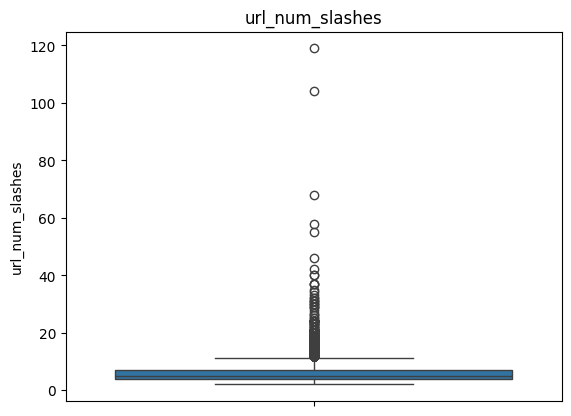

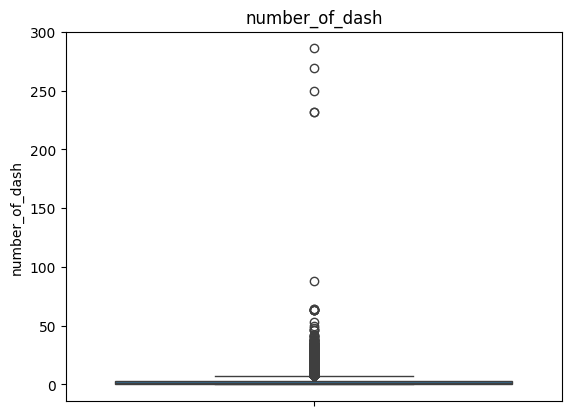

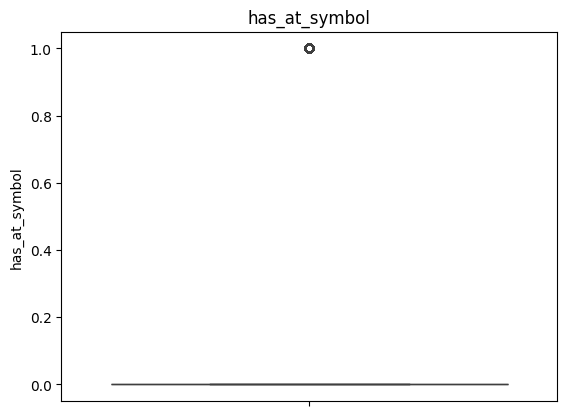

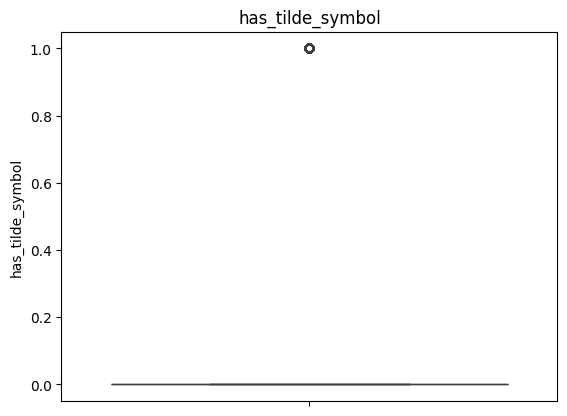

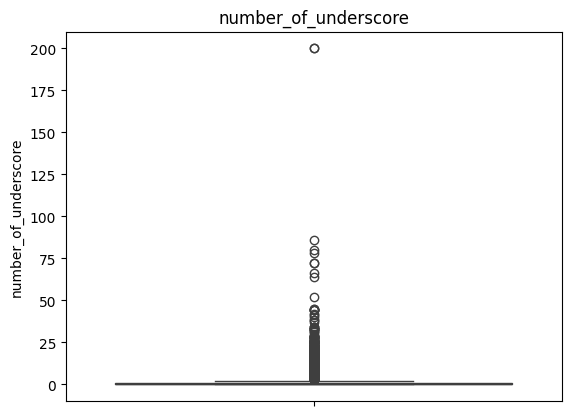

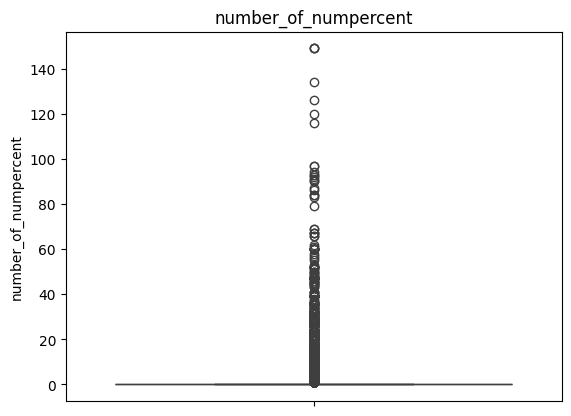

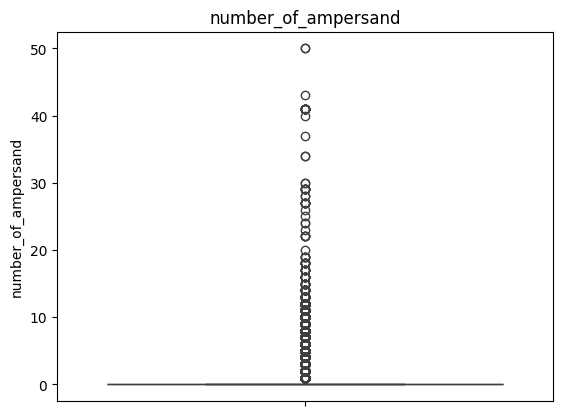

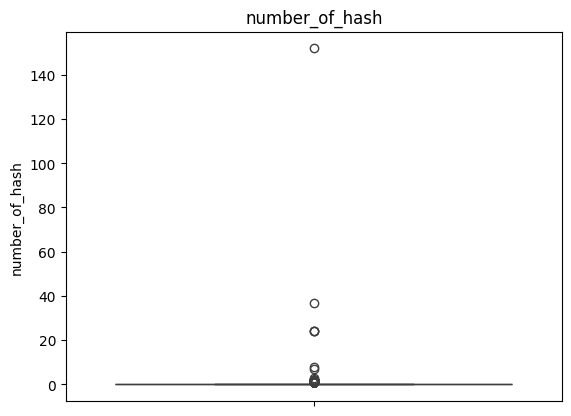

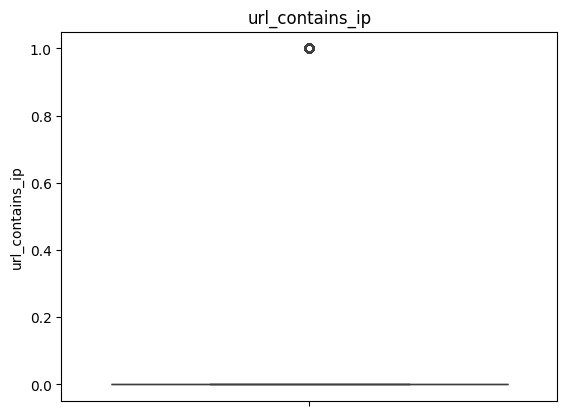

In [38]:

for i in df.columns:
    if type(df[i][0])!=str:
        sns.boxplot(df[i])
        plt.title(i)
        plt.show()

In [22]:

# Z-score method
z_scores = np.abs((df - df.mean()) / df.std())
outliers = df[z_scores > 3] 


In [23]:

# IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))]

In [24]:
#Handle outliers
# Remove outliers
df_cleaned = df.drop(outliers.index)

In [25]:

# Replace outliers with median
df_cleaned = df.copy()
df_cleaned=np.where(z_scores>3,df.median(),df)

In [26]:

# Apply log transformation
df_cleaned = np.log1p(df+0.0001)

In [27]:

# Validate the results
print(df_cleaned.describe())

             result    url_length  url_has_http//  url_has_https//  \
count  90690.000000  90690.000000    90690.000000     90690.000000   
mean       0.333557      4.454137        0.219279         0.478428   
std        0.346303      0.494221        0.322295         0.320517   
min        0.000100      2.197236        0.000100         0.000100   
25%        0.000100      4.158885        0.000100         0.000100   
50%        0.000100      4.418842        0.000100         0.693197   
75%        0.693197      4.709531        0.693197         0.693197   
max        0.693197     10.147374        0.693197         0.693197   

       url_contains_num  url_num_dots  url_num_slashes  number_of_dash  \
count      90690.000000  90690.000000     90690.000000    90690.000000   
mean           0.499758      1.368672         1.786450        0.841039   
std            0.310893      0.361132         0.325897        0.858388   
min            0.000100      0.000100         1.098646        0.000100   

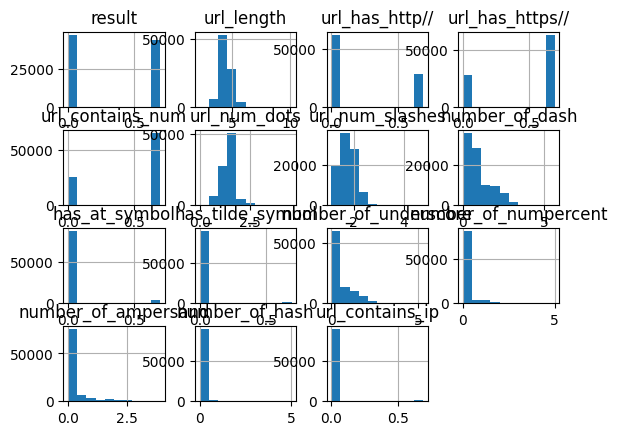

In [45]:

df_cleaned.hist()
plt.show()

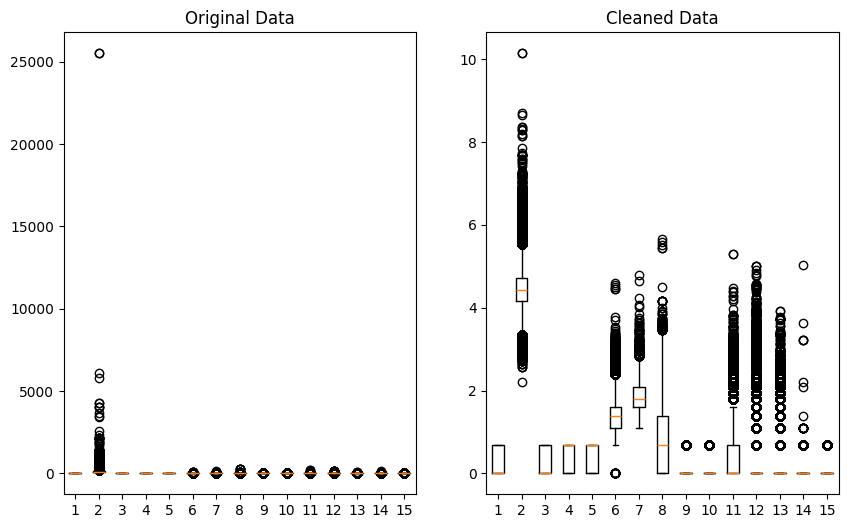

In [46]:
# Verify the results using box plots

plt.figure(figsize=(10, 6))


# Original data

plt.subplot(1, 2, 1)

plt.boxplot(df.values)

plt.title('Original Data')


# Cleaned data

plt.subplot(1, 2, 2)

plt.boxplot(df_cleaned.values)

plt.title('Cleaned Data')

plt.show()

In [28]:
X = df.drop(["result"],axis =1)
y = df["result"]

In [29]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
clmn_names=X.columns
scaled=scaler.fit_transform(X)
features=pd.DataFrame(scaled,columns=clmn_names)
features

,url_length,url_has_http//,url_has_https//,url_contains_num,url_num_dots,url_num_slashes,number_of_dash,has_at_symbol,has_tilde_symbol,number_of_underscore,number_of_numpercent,number_of_ampersand,number_of_hash,url_contains_ip
0,-0.424981,-0.680061,0.670074,-1.607180,-0.587180,-0.133377,-0.576583,-0.208349,-0.149128,-0.407268,-0.153354,-0.295187,-0.036462,-0.126707
1,-0.330511,-0.680061,0.670074,-1.607180,-0.587180,-0.133377,-0.576583,-0.208349,-0.149128,-0.407268,-0.153354,-0.295187,-0.036462,-0.126707
2,-0.290024,-0.680061,0.670074,-1.607180,-0.587180,0.302183,-0.349966,-0.208349,-0.149128,-0.407268,-0.153354,-0.295187,-0.036462,-0.126707
3,-0.323763,-0.680061,0.670074,-1.607180,-0.587180,-0.133377,-0.576583,-0.208349,-0.149128,-0.407268,-0.153354,-0.295187,-0.036462,-0.126707
4,-0.519450,-0.680061,0.670074,0.622208,-1.062856,-1.440057,-0.576583,-0.208349,-0.149128,-0.407268,-0.153354,-0.295187,-0.036462,-0.126707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90685,-0.141572,1.470457,-1.492371,-1.607180,0.364170,0.302183,0.329885,-0.208349,-0.149128,-0.407268,-0.153354,-0.295187,-0.036462,-0.126707
90686,-0.377746,1.470457,-1.492371,0.622208,-1.062856,0.302183,-0.576583,-0.208349,-0.149128,-0.017608,-0.153354,-0.295187,-0.036462,-0.126707
90687,1.234984,-0.680061,0.670074,0.622208,-0.111505,1.173303,0.783119,-0.208349,-0.149128,1.930693,-0.153354,1.380659,-0.036462,-0.126707
90688,-0.134824,1.470457,-1.492371,0.622208,-0.587180,-1.004497,-0.576583,-0.208349,-0.149128,-0.017608,-0.153354,-0.295187,-0.036462,-0.126707


In [30]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((72552, 14), (72552,), (18138, 14), (18138,))

In [31]:
X_train.shape


(72552, 14)

In [32]:
y_train.shape


(72552,)

In [33]:
X_test.shape


(18138, 14)

In [34]:
y_test.shape


(18138,)

In [35]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy=1)
X_train,y_train=smote.fit_resample(X_train,y_train)
pd.DataFrame(y_train).value_counts()

result
0         37545
1         37545
Name: count, dtype: int64

Logistic Regression

In [55]:

from sklearn.linear_model import LogisticRegression
# instantiate the model
log = LogisticRegression()
# fit the model 
Log=log.fit(X_train,y_train)
predict=Log.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [57]:
accuracy_score(y_test,predict)


0.8728636012790826

In [58]:
confusion_matrix(y_test,predict)


array([[9211,  302],
       [2004, 6621]], dtype=int64)

In [59]:

print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      9513
           1       0.96      0.77      0.85      8625

    accuracy                           0.87     18138
   macro avg       0.89      0.87      0.87     18138
weighted avg       0.89      0.87      0.87     18138



K-Nearest Neighbors : Classifier

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
Knn=knn.fit(X_train,y_train)
k_predict=Knn.predict(X_test)

In [62]:
accuracy_score(y_test,k_predict)

0.8857646929099129

In [63]:
confusion_matrix(y_test,k_predict)

array([[8658,  855],
       [1217, 7408]], dtype=int64)

In [64]:
print(classification_report(y_test,k_predict))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      9513
           1       0.90      0.86      0.88      8625

    accuracy                           0.89     18138
   macro avg       0.89      0.88      0.89     18138
weighted avg       0.89      0.89      0.89     18138



Naive Bayes : Classifier

In [65]:
# Naive Bayes Classifier Model
from sklearn.naive_bayes import GaussianNB

# instantiate the model
nb = GaussianNB()

# fit the model 
Nb=nb.fit(X_train,y_train)
n_predict=nb.predict(X_test)

In [66]:
accuracy_score(y_test,n_predict)

0.8573161318778255

In [67]:
confusion_matrix(y_test,n_predict)

array([[9416,   97],
       [2491, 6134]], dtype=int64)

In [68]:
print(classification_report(y_test,n_predict))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88      9513
           1       0.98      0.71      0.83      8625

    accuracy                           0.86     18138
   macro avg       0.89      0.85      0.85     18138
weighted avg       0.88      0.86      0.85     18138



Decision Trees : Classifier

In [70]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
dt = DecisionTreeClassifier(max_depth=30)

# fit the model 
Dt=dt.fit(X_train, y_train)
d_predict=Dt.predict(X_test)

In [71]:
accuracy_score(y_test,d_predict)

0.8595765795567317

In [72]:
confusion_matrix(y_test,d_predict)

array([[8272, 1241],
       [1306, 7319]], dtype=int64)

In [73]:
print(classification_report(y_test,d_predict))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      9513
           1       0.86      0.85      0.85      8625

    accuracy                           0.86     18138
   macro avg       0.86      0.86      0.86     18138
weighted avg       0.86      0.86      0.86     18138



Random Forest : Classifier

In [75]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=10)

# fit the model 
Forest=forest.fit(X_train,y_train)
f_predict=Forest.predict(X_test)

In [76]:
accuracy_score(y_test,f_predict)

0.8672400485169258

In [77]:
confusion_matrix(y_test,f_predict)

array([[8419, 1094],
       [1314, 7311]], dtype=int64)

In [78]:
print(classification_report(y_test,f_predict))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      9513
           1       0.87      0.85      0.86      8625

    accuracy                           0.87     18138
   macro avg       0.87      0.87      0.87     18138
weighted avg       0.87      0.87      0.87     18138



In [79]:
from sklearn.model_selection import cross_val_score
cv=cross_val_score(Forest,X_train,y_train,cv=11)
np.mean(cv)

0.8741245549398069

Gradient Boosting Classifier


In [39]:
# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
Gbc=gbc.fit(X_train,y_train)
g_predict=Gbc.predict(X_test)

In [40]:
accuracy_score(y_test,g_predict)

0.906770316462675

In [41]:
confusion_matrix(y_test,g_predict)

array([[8989,  524],
       [1167, 7458]], dtype=int64)

In [42]:
print(classification_report(y_test, g_predict))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      9513
           1       0.93      0.86      0.90      8625

    accuracy                           0.91     18138
   macro avg       0.91      0.90      0.91     18138
weighted avg       0.91      0.91      0.91     18138



Multi-layer Perceptron classifier

In [51]:
# Multi-layer Perceptron Classifier Model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier()
mlp = GridSearchCV(mlpc, parameter_space)

# fit the model 
Mlp=mlp.fit(X_train,y_train)
m_predict=Mlp.predict(X_test)

NameError: name 'GridSearchCV' is not defined

In [86]:
accuracy_score(y_test,m_predict)

0.9073216451648473

In [87]:
confusion_matrix(y_test,m_predict)

array([[8807,  706],
       [ 975, 7650]], dtype=int64)

In [88]:
print(classification_report(y_test,m_predict))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      9513
           1       0.92      0.89      0.90      8625

    accuracy                           0.91     18138
   macro avg       0.91      0.91      0.91     18138
weighted avg       0.91      0.91      0.91     18138



Support Vector Machine : Classifier

In [89]:
# Support Vector Classifier model 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}

svc = GridSearchCV(SVC(), param_grid)

# fitting the model for grid search
Svc=svc.fit(X_train, y_train)
s_predict=Svc.predict(X_test)

In [90]:
accuracy_score(y_test,s_predict)

0.9039585400815966

In [91]:
confusion_matrix(y_test,s_predict)

array([[9206,  307],
       [1435, 7190]], dtype=int64)

In [92]:
print(classification_report(y_test, s_predict))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91      9513
           1       0.96      0.83      0.89      8625

    accuracy                           0.90     18138
   macro avg       0.91      0.90      0.90     18138
weighted avg       0.91      0.90      0.90     18138



Comparision of Models

In [93]:
# Instantiate the models
logistic_regression = LogisticRegression()
knn = KNeighborsClassifier()
naive_bayes = GaussianNB()
decision_tree = DecisionTreeClassifier(max_depth=30)
random_forest = RandomForestClassifier(n_estimators=10)
gradient_boosting = GradientBoostingClassifier(max_depth=4, learning_rate=0.7)
mlp = MLPClassifier()
svc = SVC()

# Train and predict for each model
models = [
    ("Logistic Regression", logistic_regression),
    ("K-Nearest Neighbors", knn),
    ("Naive Bayes", naive_bayes),
    ("Decision Tree", decision_tree),
    ("Random Forest", random_forest),
    ("Gradient Boosting", gradient_boosting),
    ("Multi-Layer Perceptron", mlp),
    ("Support Vector", svc)
]

for model_name, model in models:
    print(f"Model: {model_name}")
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    classification = classification_report(y_test, y_pred)
    
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{confusion}")
    print(f"Classification Report:\n{classification}")
    print("-" * 50)

Model: Logistic Regression
Accuracy: 0.8728636012790826
Confusion Matrix:
[[9211  302]
 [2004 6621]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      9513
           1       0.96      0.77      0.85      8625

    accuracy                           0.87     18138
   macro avg       0.89      0.87      0.87     18138
weighted avg       0.89      0.87      0.87     18138

--------------------------------------------------
Model: K-Nearest Neighbors
Accuracy: 0.8857646929099129
Confusion Matrix:
[[8658  855]
 [1217 7408]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      9513
           1       0.90      0.86      0.88      8625

    accuracy                           0.89     18138
   macro avg       0.89      0.88      0.89     18138
weighted avg       0.89      0.89      0.89     18138

-----------------------------------------------

Testing the Model

In [94]:
X_train.head(20)

,url_length,url_has_http//,url_has_https//,url_contains_num,url_num_dots,url_num_slashes,number_of_dash,has_at_symbol,has_tilde_symbol,number_of_underscore,number_of_numpercent,number_of_ampersand,number_of_hash,url_contains_ip
0,-0.229294,-0.680061,0.670074,0.622208,0.364170,-0.133377,0.329885,-0.208349,-0.149128,-0.407268,-0.153354,-0.295187,-0.036462,-0.126707
1,-0.411485,1.470457,-1.492371,0.622208,0.364170,0.302183,-0.576583,-0.208349,-0.149128,-0.407268,-0.153354,-0.295187,-0.036462,7.892199
2,-0.330511,1.470457,-1.492371,0.622208,-0.587180,0.302183,-0.576583,-0.208349,-0.149128,0.372053,-0.153354,-0.295187,-0.036462,-0.126707
3,-0.269781,-0.680061,0.670074,0.622208,-0.111505,0.302183,-0.349966,-0.208349,-0.149128,-0.407268,-0.153354,-0.295187,-0.036462,-0.126707
4,-0.013363,-0.680061,0.670074,-1.607180,-0.111505,-0.133377,-0.576583,-0.208349,-0.149128,-0.017608,-0.153354,0.263428,-0.036462,-0.126707
5,-0.094337,-0.680061,0.670074,0.622208,-0.111505,-0.568937,-0.576583,-0.208349,-0.149128,2.320354,-0.153354,-0.295187,-0.036462,-0.126707
6,0.634428,1.470457,-1.492371,0.622208,1.791196,-0.568937,-0.123349,4.799643,-0.149128,0.761713,-0.153354,1.380659,-0.036462,-0.126707
7,0.094602,-0.680061,0.670074,0.622208,-0.587180,-0.133377,1.009736,-0.208349,-0.149128,-0.407268,-0.153354,-0.295187,-0.036462,-0.126707
8,-0.155068,-0.680061,0.670074,0.622208,-0.587180,-0.133377,0.783119,-0.208349,-0.149128,-0.017608,-0.153354,-0.295187,-0.036462,-0.126707
9,0.890845,-0.680061,0.670074,0.622208,1.315521,2.044423,-0.349966,-0.208349,-0.149128,0.372053,1.553732,1.939275,-0.036462,-0.126707


In [95]:
X_train.iloc[480]

url_length             -0.134824
url_has_http//         -0.680061
url_has_https//         0.670074
url_contains_num        0.622208
url_num_dots           -0.111505
url_num_slashes        -0.568937
number_of_dash         -0.576583
has_at_symbol          -0.208349
has_tilde_symbol       -0.149128
number_of_underscore   -0.017608
number_of_numpercent   -0.153354
number_of_ampersand     0.263428
number_of_hash         -0.036462
url_contains_ip        -0.126707
Name: 480, dtype: float64

In [43]:
Gbc.predict([[36,	0,	1,	0,	2,	5,	0,	0,	0,	0,	0,	0,	0,	0]])

array([1], dtype=int64)

Storing Best Model

In [115]:
import pickle

# dump information to that file
pickle.dump(Gbc, open('PhisLex.pkl', 'wb'))

In [50]:
import pandas as pd
import re
from sklearn.ensemble import GradientBoostingClassifier

# Define the process_url function
def process_url(user_input_url):
    data = {'url': [user_input_url]}
    df = pd.DataFrame(data)
    
    # Calculating various features
    df['url_length'] = df['url'].apply(lambda x: len(x))
    df['url_has_http'] = df['url'].apply(lambda x: 1 if 'http://' in x else 0)
    df['url_has_https'] = df['url'].apply(lambda x: 1 if 'https://' in x else 0)
    df['url_contains_num'] = df['url'].apply(lambda url: 1 if re.search(r'\d', url) else 0)
    df['url_num_dots'] = df['url'].apply(lambda x: x.count('.'))
    df['url_num_slashes'] = df['url'].apply(lambda x: x.count('/'))
    df['number_of_dash'] = df['url'].apply(lambda x: x.count('-'))
    df['has_at_symbol'] = df['url'].apply(lambda x: 1 if '@' in x else 0)
    df['has_tilde_symbol'] = df['url'].apply(lambda x: 1 if '~' in x else 0)
    df['number_of_underscore'] = df['url'].apply(lambda x: x.count('_'))
    df['number_of_numpercent'] = df['url'].apply(lambda x: x.count('%'))
    df['number_of_ampersand'] = df['url'].apply(lambda x: x.count('&'))
    df['number_of_hash'] = df['url'].apply(lambda x: x.count('#'))
    df['url_contains_ip'] = df['url'].apply(lambda url: 1 if re.search(r'\b(?:[0-9]{1,3}\.){3}[0-9]{1,3}\b', url) else 0)
    
    # Create the output format
    output_format = [df['url_length'].iloc[0],
                     df['url_has_http'].iloc[0],
                     df['url_has_https'].iloc[0],
                     df['url_contains_num'].iloc[0],
                     df['url_num_dots'].iloc[0],
                     df['url_num_slashes'].iloc[0],
                     df['number_of_dash'].iloc[0],
                     df['has_at_symbol'].iloc[0],
                     df['has_tilde_symbol'].iloc[0],
                     df['number_of_underscore'].iloc[0],
                     df['number_of_numpercent'].iloc[0],
                     df['number_of_ampersand'].iloc[0],
                     df['number_of_hash'].iloc[0],
                     df['url_contains_ip'].iloc[0]]
    
    return output_format

# Example of usage:
user_input_url = input("Enter a URL: ")
url_features = process_url(user_input_url)

# Assuming Gbc is already trained and defined elsewhere
# Gbc = GradientBoostingClassifier()  # This should be your trained classifier
# Gbc.fit(X_train, y_train)  # You would normally fit your classifier with training data

# Now use the processed URL features to predict
prediction = Gbc.predict([url_features])
print(prediction)


Enter a URL:  www.jhhsjfhjfh?jfkjk####fsjfksjf/!!!?fksjfkjskfj/899898


[1]


In [ ]:
Gbc.predict([[36,	0,	1,	0,	2,	5,	0,	0,	0,	0,	0,	0,	0,	0]])